In [28]:
import tensorflow as tf

In [29]:
from tensorflow.examples.tutorials.mnist import input_data

In [30]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [31]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001F7A68FAB08>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001F7A69028C8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001F7A6902948>)

In [32]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [33]:
mnist.test.images.shape

(10000, 784)

In [34]:
mnist.validation.images.shape

(5000, 784)

In [35]:
import numpy as np
from matplotlib import pyplot as plt

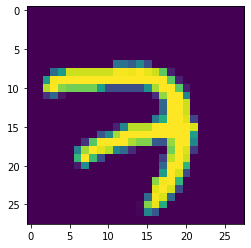

In [36]:
first_image = mnist.train.images[0]
first_image = np.array(first_image,dtype="float")
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [37]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])), #Random numbers from normal distribution
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [38]:
def forward_propagation(x, weights,biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

In [39]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder('float',[None, n_input])
y = tf.placeholder(tf.int32,[None, n_classes])

In [40]:
pred = forward_propagation(x,weights,biases)
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(y , 1)
correct_predictions = tf.equal(predictions,true_labels)
predictions_eval,labels,correct_pred = sess.run([predictions,true_labels,correct_predictions], feed_dict = {x:mnist.test.images, y:mnist.test.labels})
predictions_eval,labels,correct_pred

(array([0, 0, 5, ..., 8, 5, 7], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([False, False, False, ..., False,  True, False]))

In [41]:
correct_pred.sum() #10% Accuracy

1431

In [48]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [49]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [54]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [55]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost,optimize],feed_dict = {x:batch_x, y:batch_y})
        total_cost += c
    print(total_cost)

26151.83939766884
4625.322258323431
2751.0578570437083
1744.5262564836748
1394.796703959435
1242.507704095059
1223.6646855833815
950.1393579882505
925.5733359405336
666.18027111375
691.0685696144524
601.1316382225285
527.6410818119766
501.89083712847724
431.9833724660446
416.15311620588443
343.0562013755237
378.66018035551997
305.05619564769273
289.2652735497822
268.31713092380136
222.14740864391226
156.51431694218954
198.20317693000945
196.66405834179923


In [57]:
pred = forward_propagation(x,weights,biases)
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(y , 1)
correct_predictions = tf.equal(predictions,true_labels)
predictions_eval,labels,correct_pred = sess.run([predictions,true_labels,correct_predictions], feed_dict = {x:mnist.test.images, y:mnist.test.labels})
predictions_eval,labels,correct_pred

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [58]:
correct_pred.sum()  #96% Accuracy

9629